In [14]:
#1. Import the Data
#1.1 Import the necessary libraries (pandas, matplotlib.pyplot, seaborn, numpy, and scipy.stats)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import scipy.stats as stats

In [18]:
#1.2 Read the CSV file (marketing_data.csv) using pd.read_csv() and store it in a DataFrame (data)

In [20]:
data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\IIt K Analytics course\Python\marketing_data.csv")

In [22]:
#1.3 Print a snapshot of the data (data.head()) and check the data types and missing values (data.info())

In [24]:
data.head()

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [30]:
#2: Investigate the Variables
#2.1: Check variables like Dt_Customer and Income to ensure they are imported correctly

In [32]:
data.columns = data.columns.str.replace(' ', '').str.lower()

In [ ]:
#2.2: Convert the income column to a float by removing '$' and ',' and using astype('float')

In [34]:
data['income'] = data['income'].str.replace('[\$,]', '', regex=True).str.strip().astype('float')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\User\AppData\Local\Temp\ipykernel_18292\2433560080.py:1: SyntaxWarning: invalid escape sequence '\$'
  data['income'] = data['income'].str.replace('[\$,]', '', regex=True).str.strip().astype('float')


In [ ]:
#2.3:  Convert the Dt_Customer column to a datetime object using pd.to_datetime()

In [36]:
data.dt_customer = pd.to_datetime(data.dt_customer)

C:\Users\User\AppData\Local\Temp\ipykernel_18292\2431619090.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.dt_customer = pd.to_datetime(data.dt_customer)


In [ ]:
#3: Impute the Missing Value
#3.1: Check for missing values using data.isnull().sum()

In [38]:
data.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
response                0
complain                0
country                 0
dtype: int64

In [ ]:
#3.2:  Clean the marital_status and education categories (example combining similar categories)

In [40]:
data.marital_status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [ ]:
#3.3:  Impute missing income values based on similar education and marital_status categories' average incomes

In [42]:
def change(x):
  if x in ['Married', 'Together']:
    return 'couple'
  else :
    return 'alone'
data.marital_status = data.marital_status.apply(change)

In [44]:
agg_data = data.groupby(['education', 'marital_status'])[['income']].mean().unstack()['income']
agg_data

marital_status,alone,couple
education,,
2n Cycle,51957.984375,45597.992647
Basic,17998.350000,21663.852941
Graduation,52615.569652,52779.380952
Master,53170.472000,52785.795833
PhD,54050.657143,57343.238562


In [46]:
for edu in data.education.unique():
  for status in data.marital_status.unique():
    val = agg_data.loc[edu, status]
    data.loc[(data.education == edu) & (data.marital_status == status) & (data.income.isnull()),'income'] = val

In [ ]:
#4: Create the Variables
#4.1: Calculate the age of customers based on year_birth

In [48]:
data['age'] = 2024 - data.year_birth

In [ ]:
#4.2: Calculate spending as the sum of spending columns (mntwines, mntfruits)

In [50]:
data['spending'] = data.loc[:,data.columns.str.startswith('mnt')].sum(axis = 1)

In [ ]:
#4.3: Calculate children_count as the sum of kidhome and teenhome

In [52]:
data['children_count'] = data.kidhome + data.teenhome

In [ ]:
#4.4: Create a binary variable has_children indicating if a customer has children

In [54]:
data['has_children'] = np.where((data.kidhome + data.teenhome) > 0, 1,0)

In [ ]:
#4.5: Derive total_purchases from the sum of purchase columns

In [56]:
data['total_purchases'] = data.loc[:, data.columns.str.endswith('purchases')].sum(axis = 1)

In [58]:
data['education_years'] = data.education.replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})

C:\Users\User\AppData\Local\Temp\ipykernel_18292\2722653900.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education_years'] = data.education.replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})


In [ ]:
#5: Generate Box Plots and Histograms
#5.1: Plot box plots and histograms for numerical variables (income, spending, age, and total_purchases) to understand their distributions and identify outliers

In [60]:
data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'age', 'spending',
       'children_count', 'has_children', 'total_purchases', 'education_years'],
      dtype='object')

In [62]:
num_vars = ['income', 'spending', 'age', 'total_purchases']

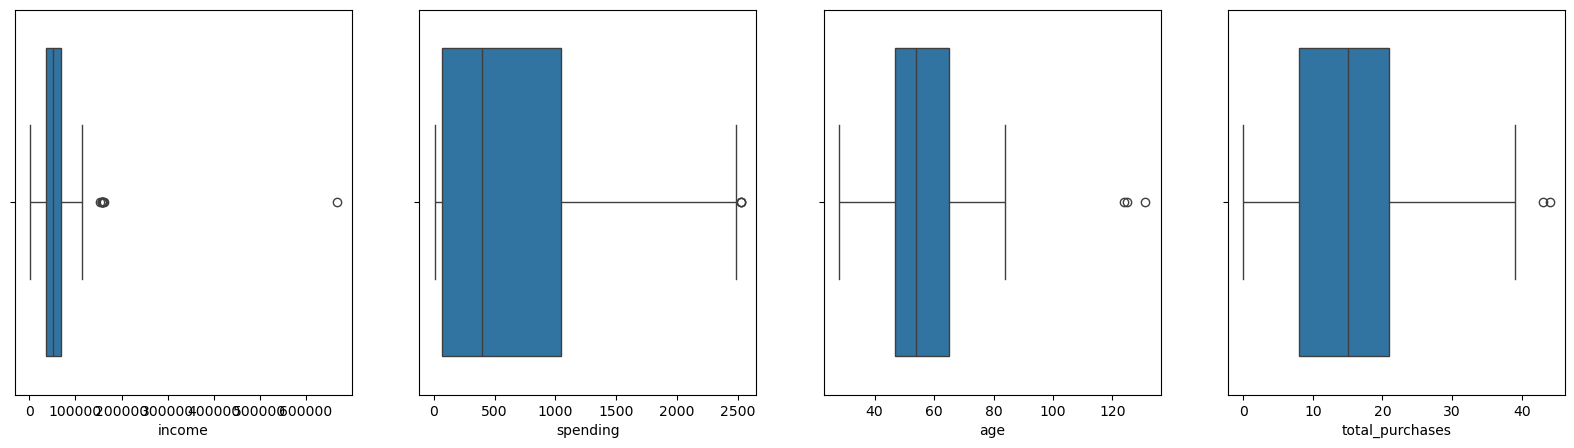

In [64]:
f,ax = plt.subplots(1, len(num_vars), figsize = (20,5))
i = 0
for v in num_vars:
  sns.boxplot(x = data[v], ax = ax[i])
  i += 1
plt.show()

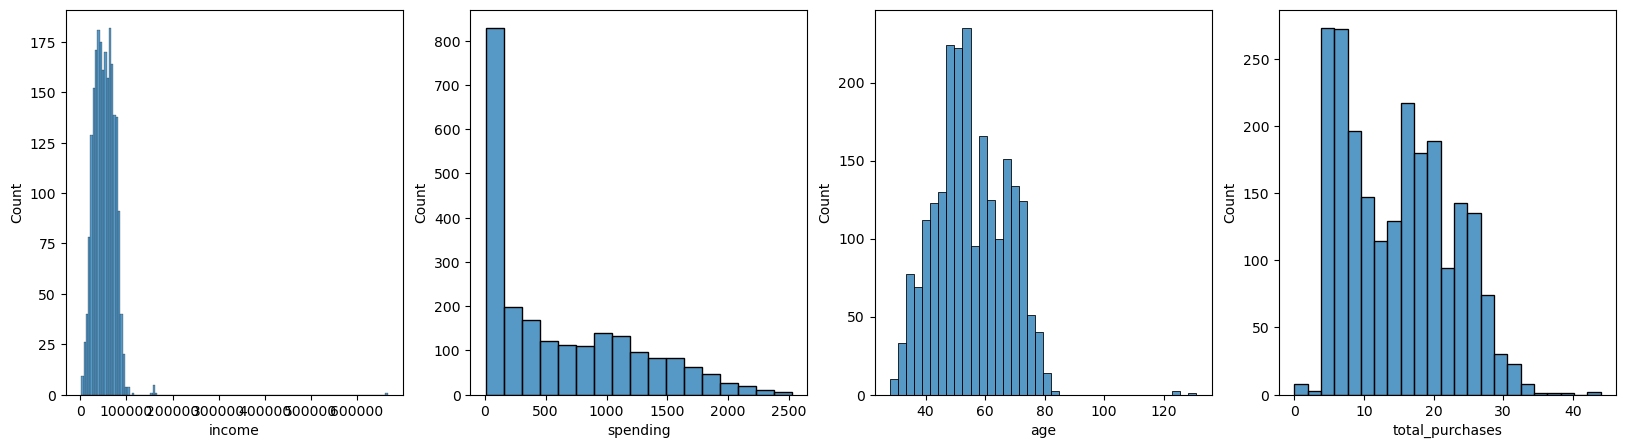

In [66]:
f,ax = plt.subplots(1, len(num_vars), figsize = (20,5))
i = 0
for v in num_vars:
  sns.histplot(x = data[v], ax = ax[i])
  i += 1
plt.show()

In [68]:
def outlier_detection(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3 - q1
  ll = q1 - (1.5 * iqr)
  ul = q3 + (1.5 * iqr)
  return ll, ul

In [ ]:
#5.2: Perform outlier treatment by capping the outliers to the upper and lower limits

In [70]:
for v in num_vars:
  print("Var = ", v)
  ll,ul = outlier_detection(data[v])
  print('ll = {} ul = {}'.format(ll,ul))
  data.loc[data[v]<ll, v] = ll
  data.loc[data[v]>ul, v] = ul

Var =  income
ll = -13587.75 ul = 117416.25
Var =  spending
ll = -1396.375 ul = 2510.625
Var =  age
ll = 20.0 ul = 92.0
Var =  total_purchases
ll = -11.5 ul = 40.5


C:\Users\User\AppData\Local\Temp\ipykernel_18292\1499794312.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1396.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[v]<ll, v] = ll
C:\Users\User\AppData\Local\Temp\ipykernel_18292\1499794312.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-11.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[v]<ll, v] = ll


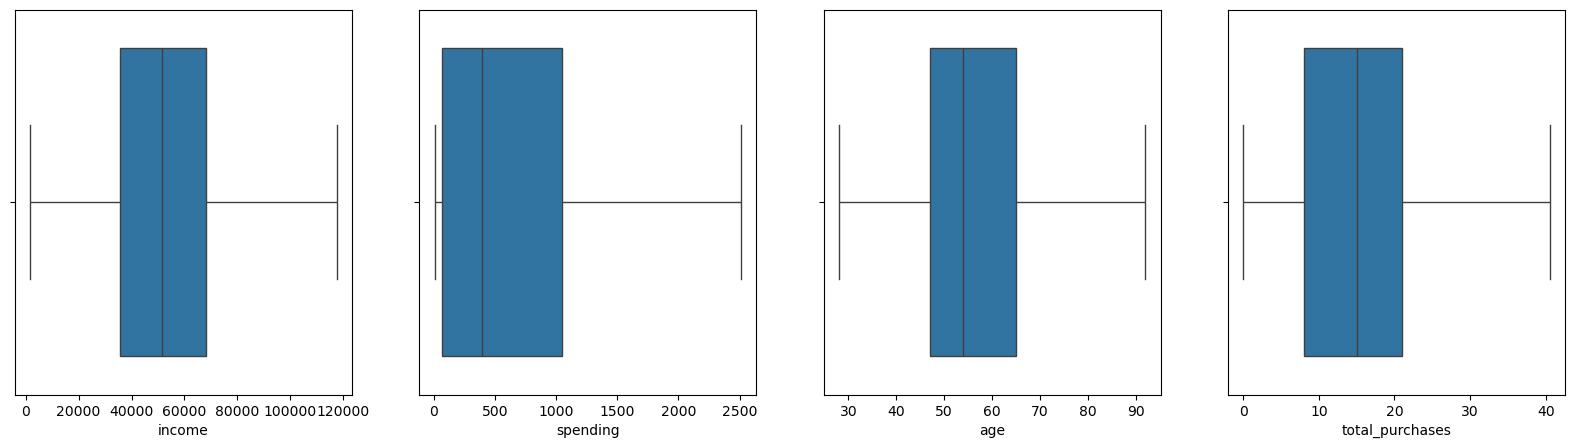

In [72]:
f,ax = plt.subplots(1, len(num_vars), figsize = (20,5))
i = 0
for v in num_vars:
  sns.boxplot(x = data[v], ax = ax[i])
  i += 1
plt.show()

In [ ]:
#6: Encode the Data
#6.2: For education, we use an ordinal encoder

In [74]:
data.select_dtypes('object')

,education,marital_status,country
0,Graduation,alone,SP
1,Graduation,alone,CA
2,Graduation,couple,US
3,Graduation,couple,AUS
4,Graduation,alone,SP
...,...,...,...
2235,PhD,alone,US
2236,2n Cycle,couple,SP
2237,Graduation,alone,SP
2238,Graduation,couple,IND


In [76]:
data.education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [78]:
ord = OrdinalEncoder(categories = [['Basic','2n Cycle','Graduation', 'Master','PhD']])
ord.fit(data[['education']])
data['education_encode'] = ord.transform(data[['education']]).flatten()

In [ ]:
#6.2: Use one-hot encoding for country and marital_status columns

In [80]:
ohe = OneHotEncoder()

In [82]:
country_encode = pd.DataFrame(ohe.fit_transform(data[['country']]).toarray().astype(int),
             columns = ohe.categories_[0])
country_encode

,AUS,CA,GER,IND,ME,SA,SP,US
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,1
2236,0,0,0,0,0,0,1,0
2237,0,0,0,0,0,0,1,0
2238,0,0,0,1,0,0,0,0


In [84]:
marital_status_encode = pd.DataFrame(ohe.fit_transform(data[['marital_status']]).toarray().astype(int),
             columns = ohe.categories_[0])
marital_status_encode

,alone,couple
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
2235,1,0
2236,0,1
2237,1,0
2238,0,1


In [ ]:
#Concat these new df to the old one

In [90]:
new_data = pd.concat([data,pd.get_dummies(data[['country', 'marital_status']])], axis = 1)

In [92]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2240 non-null   int64         
 1   year_birth             2240 non-null   int64         
 2   education              2240 non-null   object        
 3   marital_status         2240 non-null   object        
 4   income                 2240 non-null   float64       
 5   kidhome                2240 non-null   int64         
 6   teenhome               2240 non-null   int64         
 7   dt_customer            2240 non-null   datetime64[ns]
 8   recency                2240 non-null   int64         
 9   mntwines               2240 non-null   int64         
 10  mntfruits              2240 non-null   int64         
 11  mntmeatproducts        2240 non-null   int64         
 12  mntfishproducts        2240 non-null   int64         
 13  mnt

In [ ]:
#7: Analyze the Correlation between the variables
#7.1: Select a subset of columns for correlation analysis

In [94]:
new_data.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'response', 'complain', 'country', 'age', 'spending',
       'children_count', 'has_children', 'total_purchases', 'education_years',
       'education_encode', 'country_AUS', 'country_CA', 'country_GER',
       'country_IND', 'country_ME', 'country_SA', 'country_SP', 'country_US',
       'marital_status_alone', 'marital_status_couple'],
      dtype='object')

In [96]:
var_cor = ['income', 'age', 'children_count', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth','spending', 'total_purchases'
       ]

In [ ]:
#7.2: Compute the correlation matrix (new_data[var_cor].corr()) and plot a heatmap (sns.heatmap())

In [98]:
cor_data = new_data[var_cor].corr()

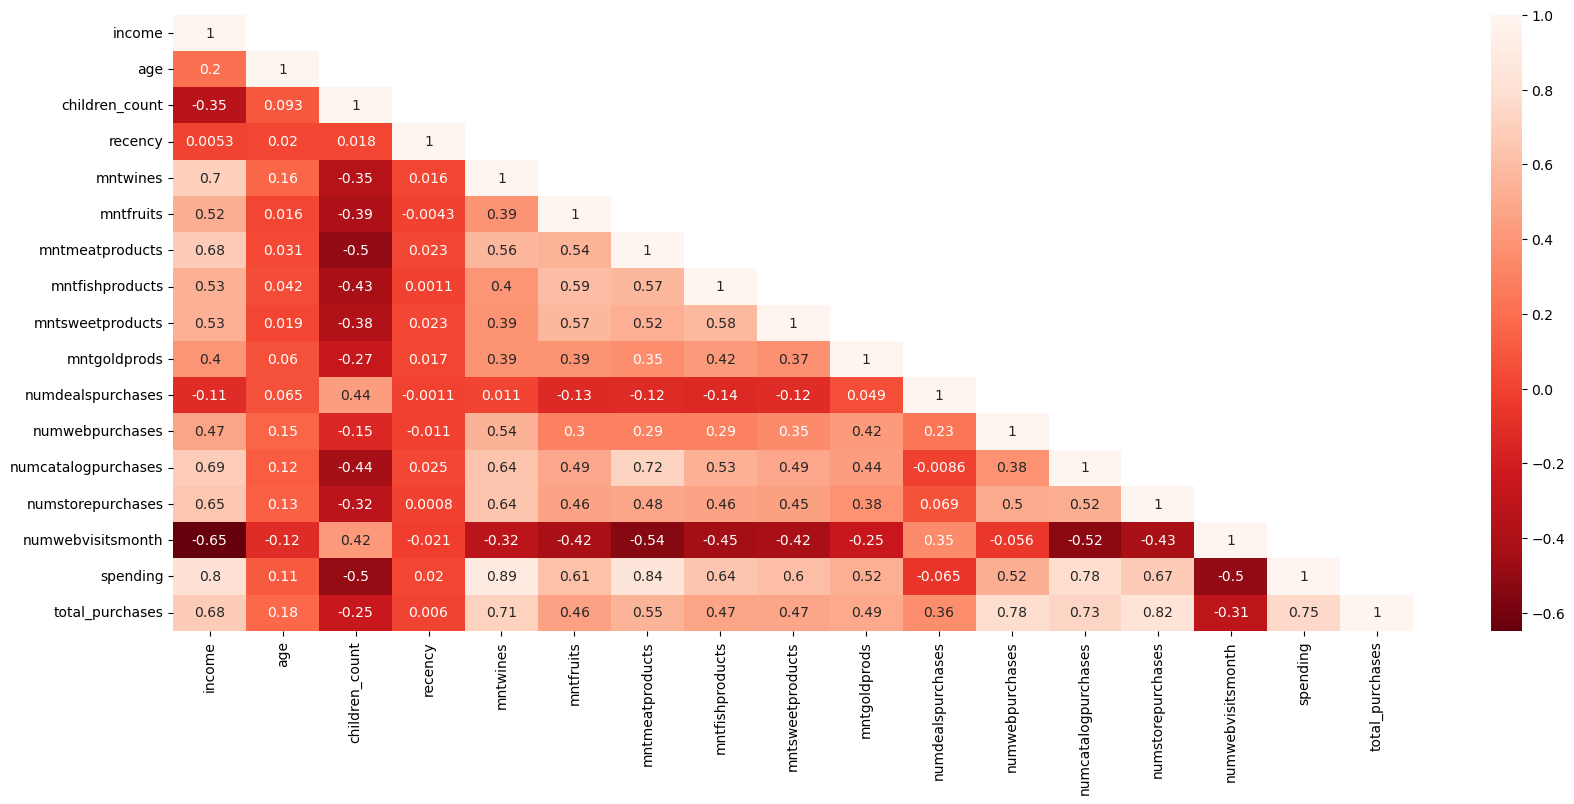

In [100]:
plt.figure(figsize = (20,8))
m = np.ones_like(cor_data)
m[np.tril_indices_from(m)]= 0
sns.heatmap(cor_data, mask = m, annot = True, cmap = 'Reds_r')
plt.show()

In [ ]:
# 8:Conduct a Hypothesis Testing
# 8.1:Define and test hypotheses related to customer behavior using statistical tests, such as (stats.ttest_ind())

In [ ]:
#Test the following hypotheses:
#Older people are not as tech-savvy and probably prefer shopping in-store.
#H0: For older customers, the number of purchases in-store is less than or equal to the number of purchases online
#Ha: For older customers, the number of purchases in-store is greater than the number of purchases online.

In [102]:
store = new_data.loc[new_data.age >= 60, 'numstorepurchases']
web = new_data.loc[new_data.age >= 60, 'numwebpurchases']
stats.ttest_ind(store,web, alternative='greater' )

TtestResult(statistic=12.456766178670938, pvalue=2.4611358913448465e-34, df=1570.0)

In [ ]:
#Since the p-value is much less than the alpha of 5%, we shall reject the null hypothesis and conclude that older customers prefer store purchases.
#Test the following hypotheses:
#Customers with kids probably have less time to visit a store and would prefer to shop online.
#H0: For customers who have children, the number of purchases online is less than or equal to the number of purchases in-store.
#Ha: For customers who have children, the number of purchases online is greater than the number of purchases in-store.

In [104]:
online = new_data.loc[new_data.has_children == 1,'numwebpurchases']
store_p = new_data.loc[new_data.has_children == 1,'numstorepurchases']
stats.ttest_ind(online, store_p, alternative = "greater")

TtestResult(statistic=-11.85534380488127, pvalue=1.0, df=3202.0)

In [ ]:
#Since the p-value is 1 and much greater than the alpha of 5%, we fail to reject the null hypothesis and conclude that people who have children prefer store purchases over online purchases
#Other distribution channels may cannibalize sales at the store
#H0 : purchases through other channels <= no. of store purchases
#Ha : purchases through other channels > no. of store purchases

In [106]:
other = new_data.loc[:,['numwebpurchases', 'numcatalogpurchases']].sum(axis = 1)
store = new_data.loc[:, 'numstorepurchases']
stats.ttest_ind(other, store, alternative ="greater")


TtestResult(statistic=7.884334964023309, pvalue=1.971324447658957e-15, df=4478.0)

In [ ]:
#Since the p-value is much less than the alpha of 5%, we shall reject the null hypothesis and conclude that other distribution channels, such as web purchases or catalog purchases, are preferred over store purchases.
#Identify wether the US fares significantly better than the rest of the world in terms of total purchases
#H0 : total_purchases_us <= total_purchases_row
#Ha : total_purchases_us > total_purchases_row

In [108]:
total_purchases_us = new_data.loc[new_data.country == "US",'total_purchases']
total_purchases_row = new_data.loc[new_data.country != "US",'total_purchases']
stats.ttest_ind(total_purchases_us ,total_purchases_row, alternative = 'greater')

TtestResult(statistic=1.7339544907234352, pvalue=0.04153193317039351, df=2238.0)

In [ ]:
#At the 5% significance level, we reject the null hypothesis. Therefore, we can conclude that the US performs better in terms of the number of purchases compared to the rest of the world.

In [ ]:
#9:Visualize the Data
#9.1: Visualize the performance of products (prod_data) using a bar plot

C:\Users\User\AppData\Local\Temp\ipykernel_18292\1272569968.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(prod_data[i], xy = (i-0.15, prod_data[i]+2), size =15 , weight = 'heavy')


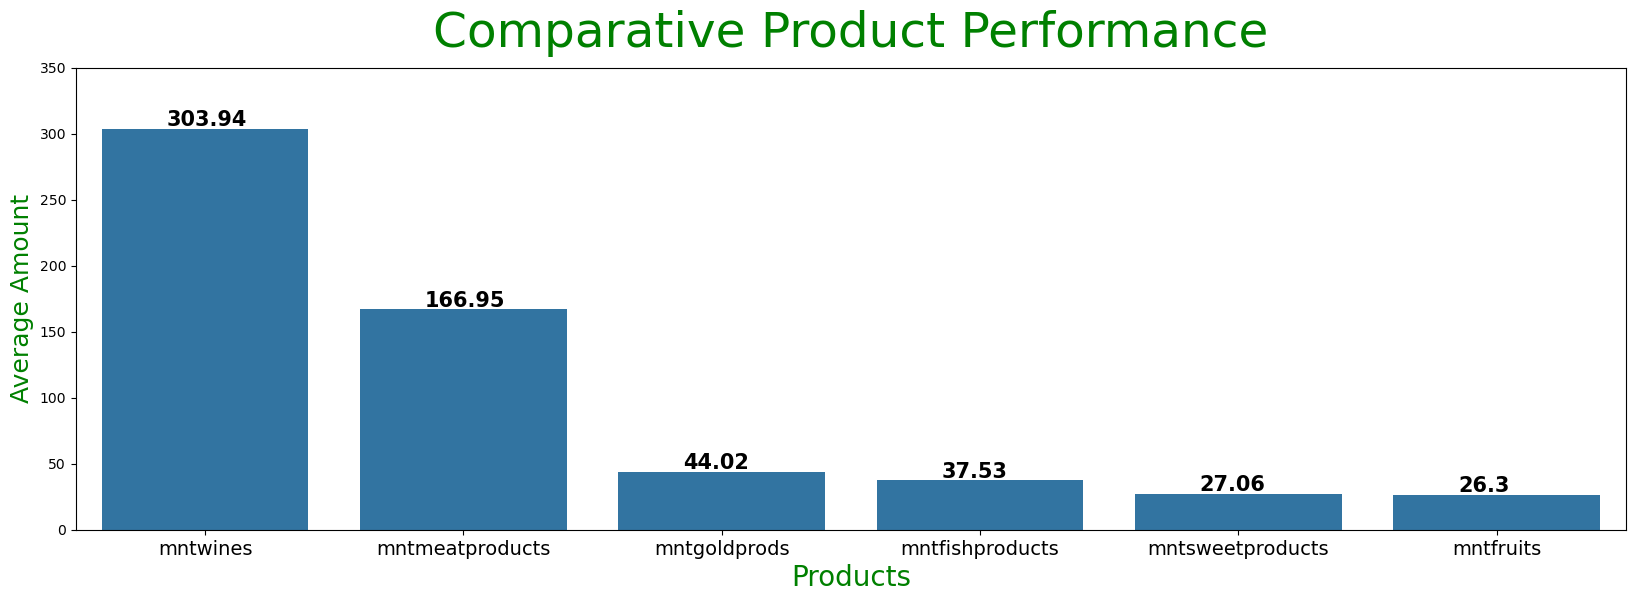

In [110]:
prod_data = new_data.loc[:,new_data.columns.str.startswith('mnt')].mean().round(2).sort_values(ascending = False)
plt.figure(figsize = (20,6))
sns.barplot(x = prod_data.index, y = prod_data.values, order=prod_data.index)
for i in range(prod_data.size):
  plt.annotate(prod_data[i], xy = (i-0.15, prod_data[i]+2), size =15 , weight = 'heavy')
plt.ylim(0, 350)
plt.xlabel( 'Products', size = 20, color = 'green')
plt.ylabel( 'Average Amount', size = 18, color = 'green')
plt.title('Comparative Product Performance', size = 35, pad = 15, color = 'green')
plt.xticks(size = 14)
plt.show()

In [ ]:
#9.2: Explore the relationship between age and campaign acceptance rate (acceptedcmp5) using a bar plot

In [112]:
data['age_grp'] = pd.cut(data.age, bins = 5, labels = [1,2,3,4,5])

In [114]:
grpd_age = data.groupby('age_grp')['age'].agg(['min','max'])
grpd_age['group'] = grpd_age['min'].astype(str) + ' - ' +grpd_age['max'].astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_18292\3866832219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grpd_age = data.groupby('age_grp')['age'].agg(['min','max'])


In [ ]:
#Renaming labels

In [116]:
data.age_grp = data.age_grp.replace([1,2,3,4,5], grpd_age.group)

C:\Users\User\AppData\Local\Temp\ipykernel_18292\1402206506.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data.age_grp = data.age_grp.replace([1,2,3,4,5], grpd_age.group)


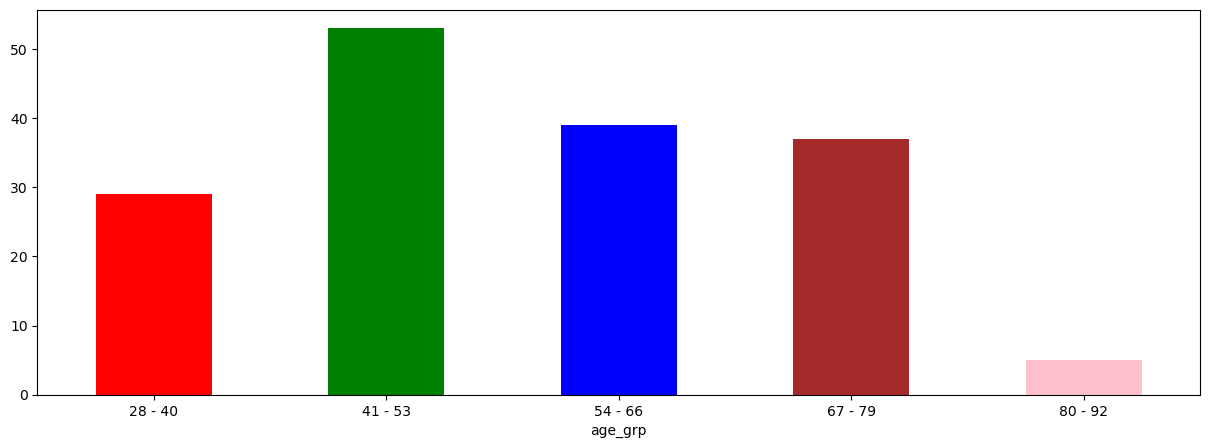

In [118]:
vc = data[data.acceptedcmp5 == 1].age_grp.value_counts().sort_index()
plt.figure(figsize = (15,5))
vc.plot.bar(color = ['red', 'green', 'blue', 'brown', 'pink'])
plt.xticks(rotation = 0)
plt.show()

In [ ]:
#9.3: Determine the country with the most customers who accepted the last campaign using a bar plot

C:\Users\User\AppData\Local\Temp\ipykernel_18292\3857655800.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(accptd_data[i], xy = (i-0.05, accptd_data[i]+2), size =15 , weight = 'heavy')


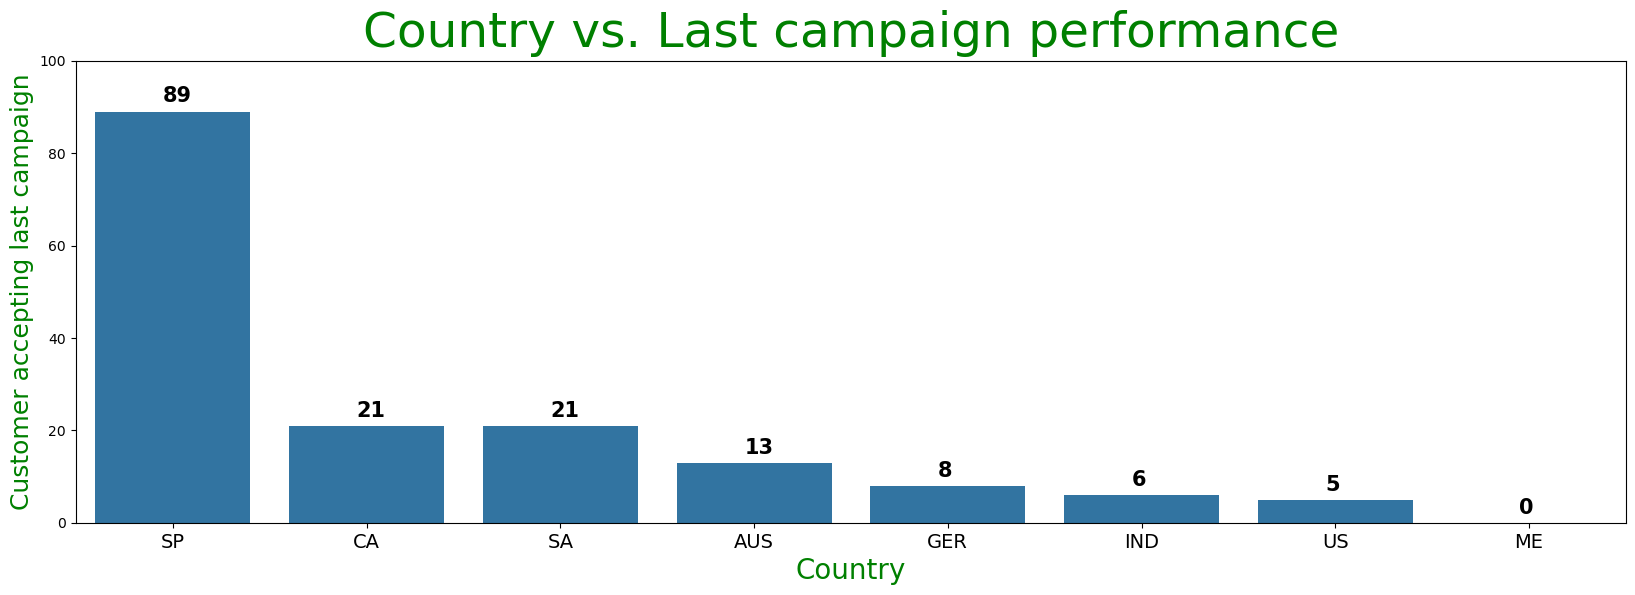

In [120]:
accptd_data = new_data.groupby('country')[['acceptedcmp5']].agg('sum').squeeze().sort_values(ascending = False)
plt.figure(figsize = (20,6))
sns.barplot(x = accptd_data.index, y = accptd_data.values, order=accptd_data.index)
for i in range(accptd_data.size):
  plt.annotate(accptd_data[i], xy = (i-0.05, accptd_data[i]+2), size =15 , weight = 'heavy')
plt.ylim(0,100)
plt.xlabel( 'Country', size = 20, color = 'green')
plt.ylabel( 'Customer accepting last campaign', size = 18, color = 'green')
plt.title('Country vs. Last campaign performance', size = 35, pad = 10, color = 'green')
plt.xticks(size = 14)
plt.show()

In [ ]:
#9.4: Analyze the relationship between children_count and spending using a strip plot

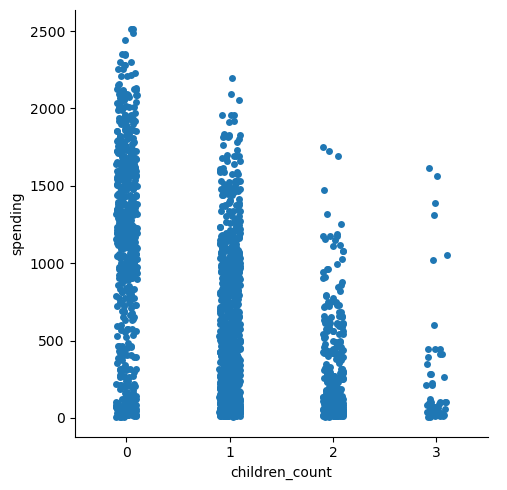

In [122]:
sns.catplot(x = 'children_count', y = 'spending',data = new_data, kind = "strip")

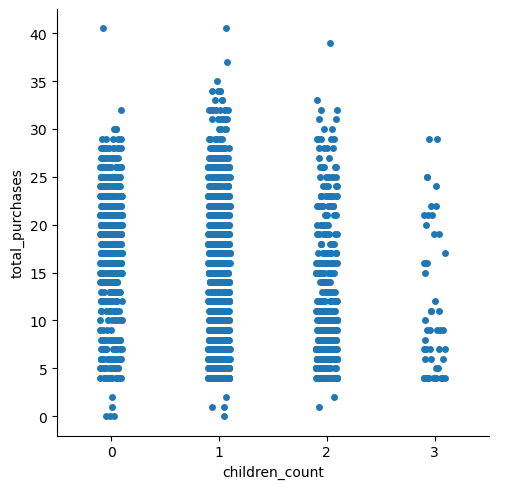

In [124]:
sns.catplot(x = 'children_count', y = 'total_purchases',data = new_data, kind = "strip")

In [ ]:
#9.5:  Visualize the education background of customers who complained in the last two years using a bar plot

C:\Users\User\AppData\Local\Temp\ipykernel_18292\3740582564.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+0.5), size =15 , weight = 'heavy')


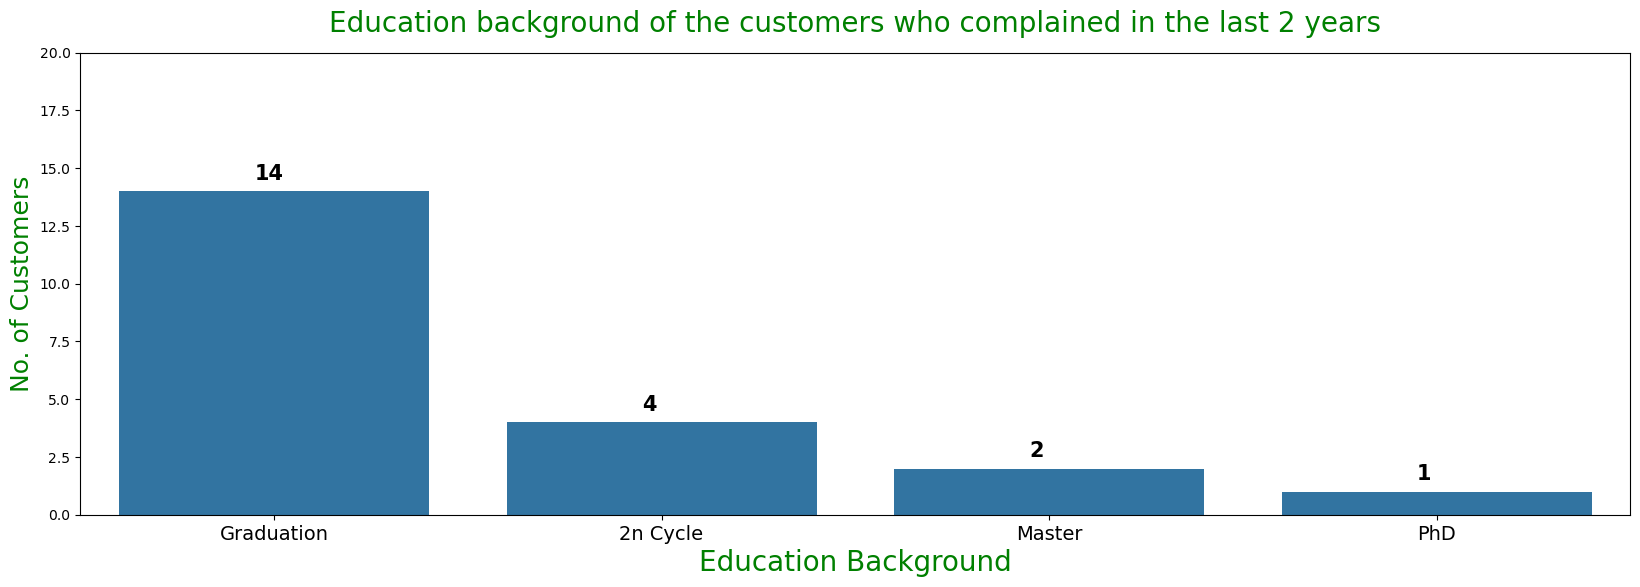

In [126]:
vc = new_data.loc[new_data.complain == 1, 'education'].value_counts()
plt.figure(figsize = (20,6))
sns.barplot(x = vc.index, y = vc.values, order=vc.index)
for i in range(vc.size):
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+0.5), size =15 , weight = 'heavy')
plt.ylim(0, 20)
plt.xlabel( 'Education Background', size = 20, color = 'green')
plt.ylabel( 'No. of Customers', size = 18, color = 'green')
plt.title('Education background of the customers who complained in the last 2 years', size = 20, pad = 15, color = 'green')
plt.xticks(size = 14)
plt.show()

In [ ]:
#9.6: Explore the relationship between income and spending using a scatter plot

<Axes: xlabel='income', ylabel='spending'>

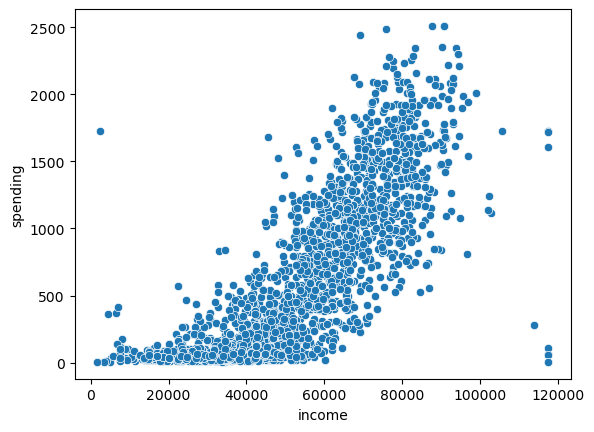

In [128]:
sns.scatterplot(x = 'income', y = 'spending', data = new_data)

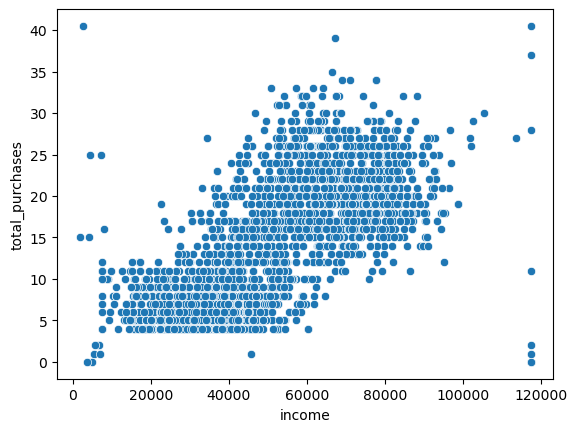

In [130]:
sns.scatterplot(x = 'income', y = 'total_purchases', data = new_data)
plt.show()

D:\Python\Lib\site-packages\seaborn\categorical.py:2761: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


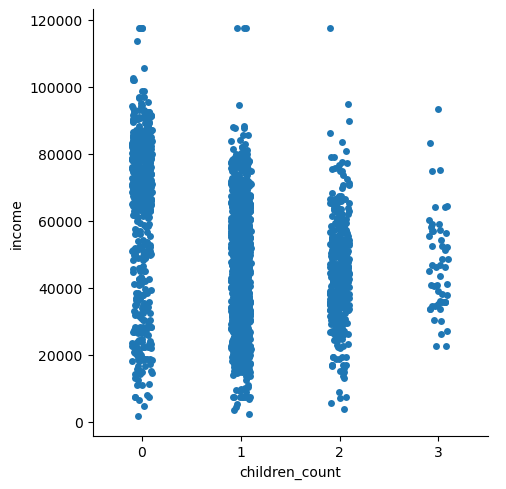

In [132]:
sns.catplot(y = 'income', x = 'children_count', data = new_data, kind = 'strip', ax = ax)
plt.show()